### Importing Relevant Packages

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [7]:
raw_csv_data = pd.read_csv("../data/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()



### Removing Surplus Data

In [8]:
df_comp['market_value']=df_comp.spx

In [9]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [10]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))


In [12]:
df.loc[:, 'wn'] = wn

In [13]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1484.303301
1994-01-10,475.27,1089.157945
1994-01-11,474.13,1046.319110
1994-01-12,474.17,1242.744355
1994-01-13,472.47,1158.155663


In [14]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.609838
std,292.559287,291.318004
min,438.920000,-100.873752
25%,914.620000,894.788537
50%,1144.650000,1089.101454
75%,1316.280729,1288.328728
max,1570.252238,2179.550671


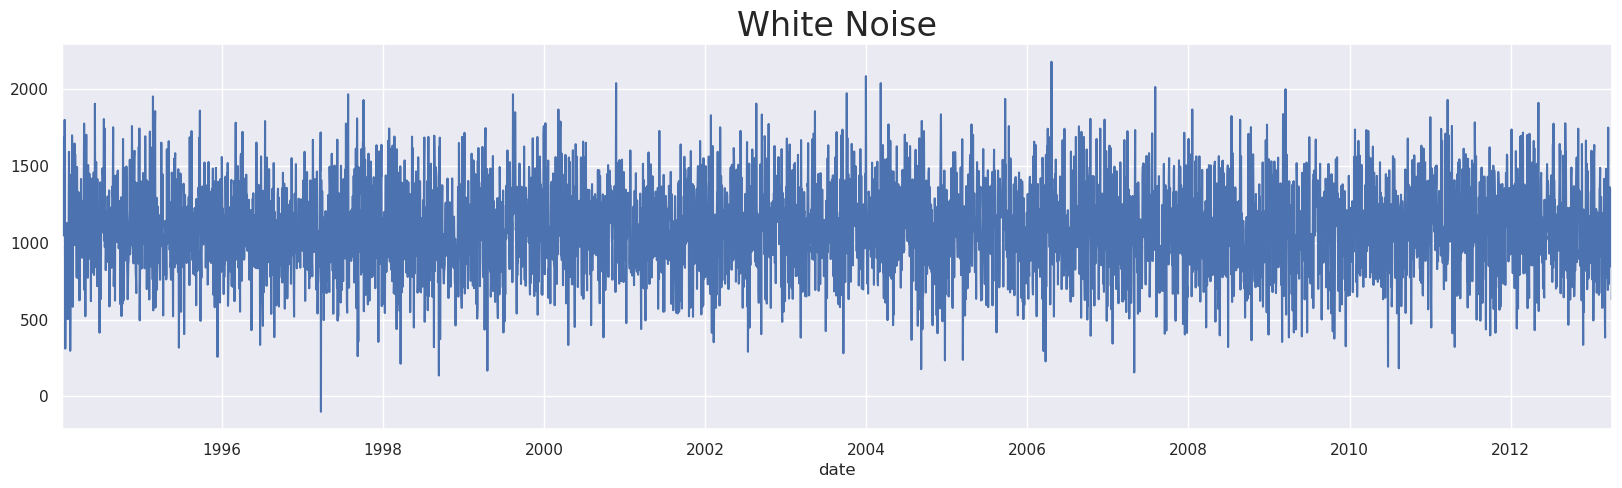

In [15]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise", size=24)
plt.show()

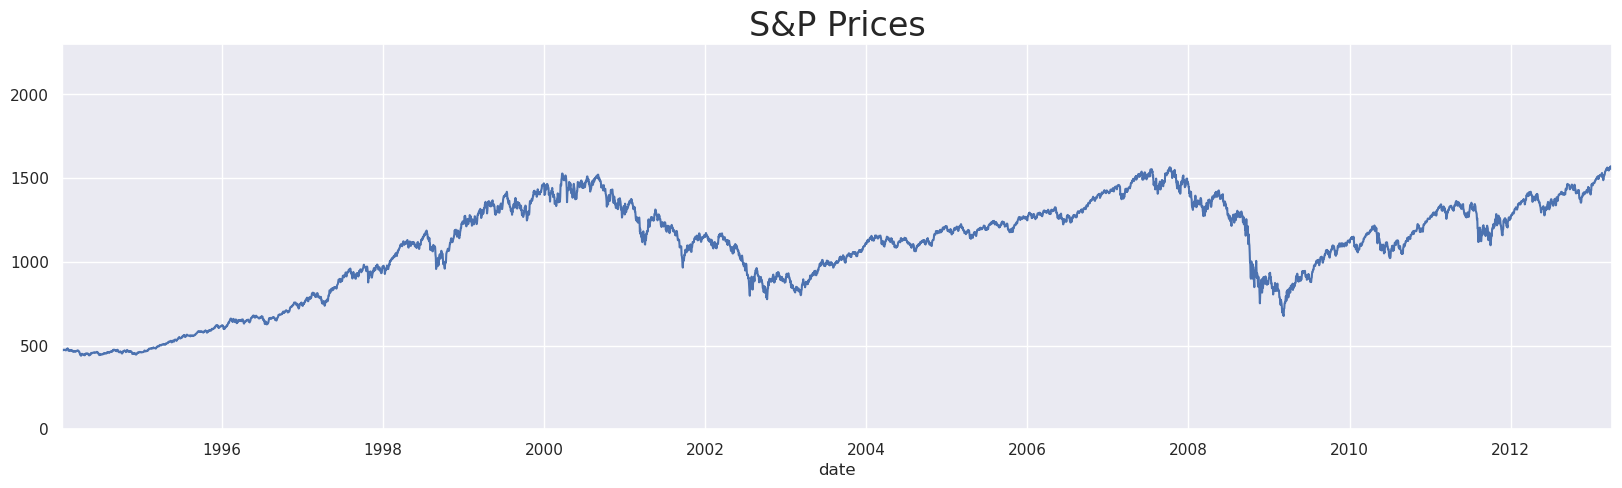

In [17]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [18]:
rw = pd.read_csv("../data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')
rw = rw.ffill()
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [20]:
df.loc[:, 'rw'] = rw.price

In [21]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1484.303301,1122.139662
1994-01-10,475.27,1089.157945,1080.347860
1994-01-11,474.13,1046.319110,1082.095245
1994-01-12,474.17,1242.744355,1083.639265
1994-01-13,472.47,1158.155663,1067.146255


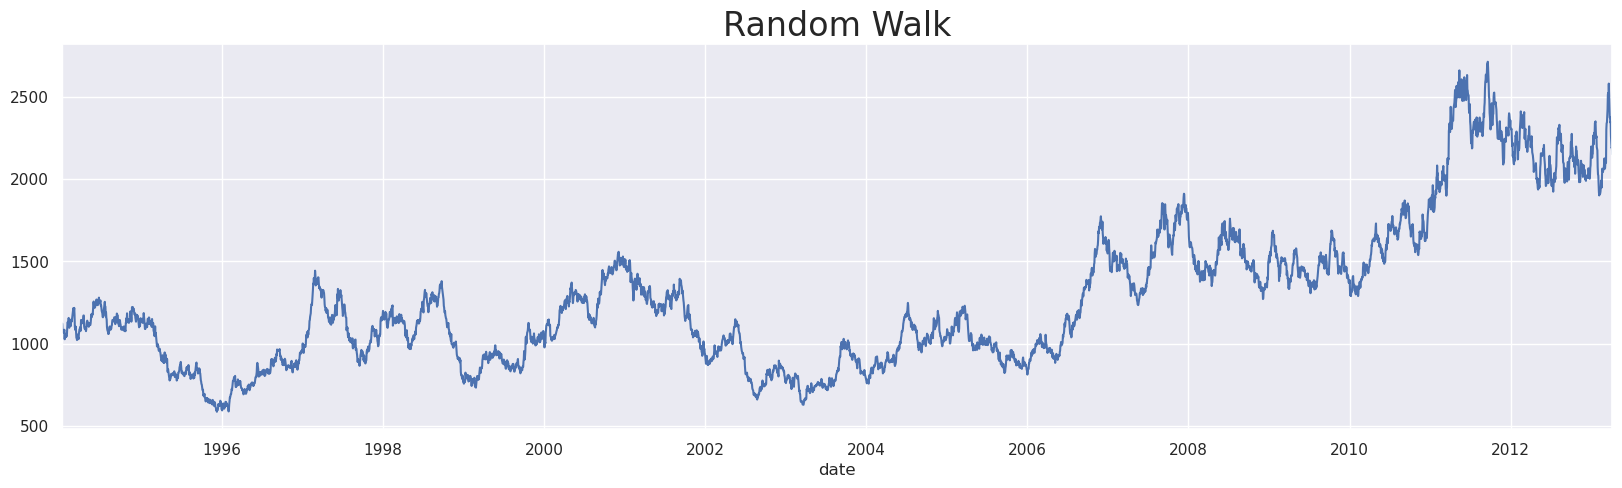

In [22]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk", size=24)
plt.show()

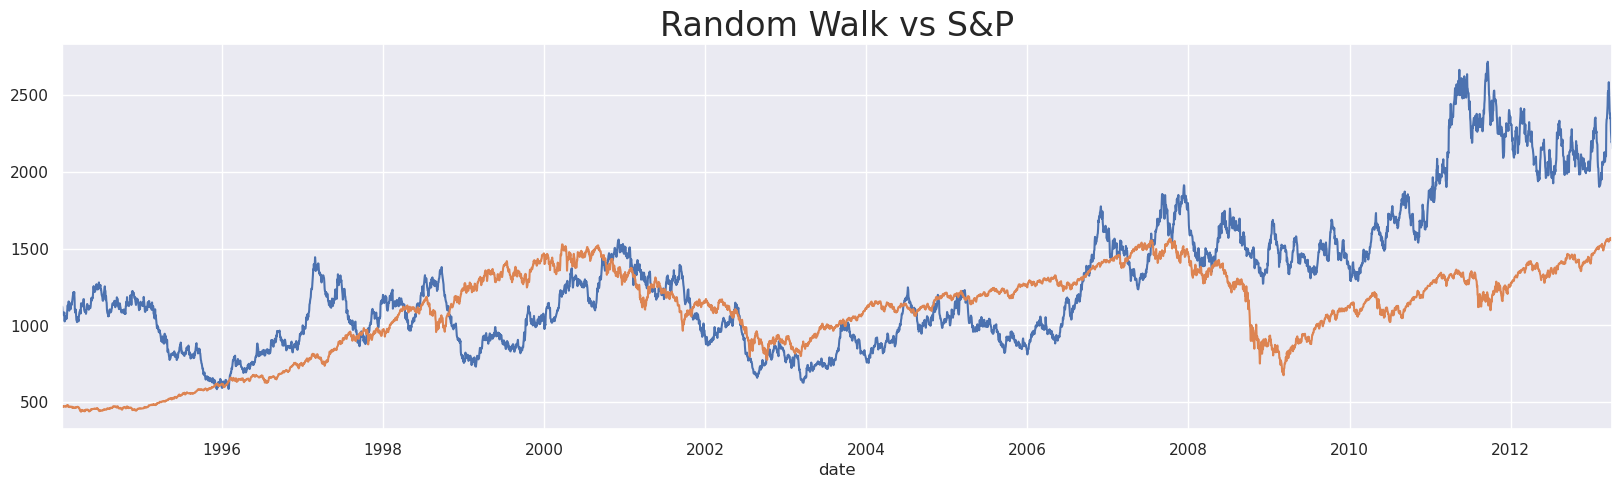

In [24]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size=24)
plt.show()

### Stationarity

In [25]:
sts.adfuller(df.market_value)

(np.float64(-1.736984745235242),
 np.float64(0.41216456967706294),
 18,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(39904.880607487445))

In [26]:
sts.adfuller(df.wn)

(np.float64(-72.120683242261),
 0.0,
 0,
 5020,
 {'1%': np.float64(-3.431653316130827),
  '5%': np.float64(-2.8621159253018247),
  '10%': np.float64(-2.5670765656497516)},
 np.float64(70743.67876293506))

In [27]:
sts.adfuller(df.rw)

(np.float64(-1.328607392768972),
 np.float64(0.6159849181617384),
 24,
 4996,
 {'1%': np.float64(-3.4316595802782865),
  '5%': np.float64(-2.8621186927706463),
  '10%': np.float64(-2.567078038881065)},
 np.float64(46299.333497595144))

### Seasonality

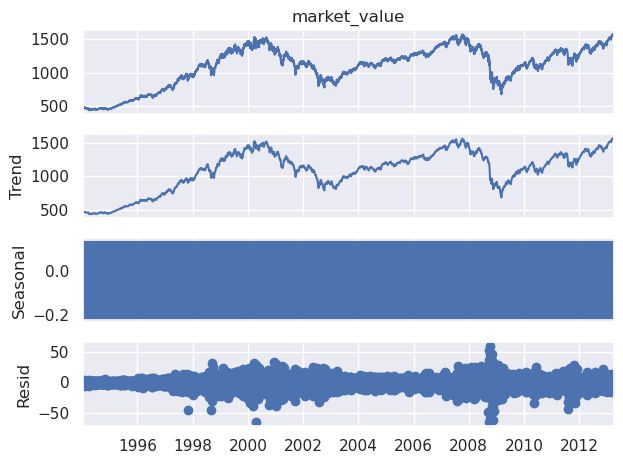

In [33]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

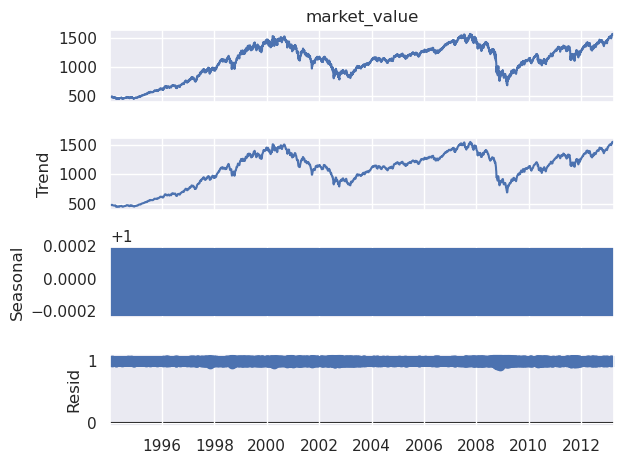

In [34]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

### ACF

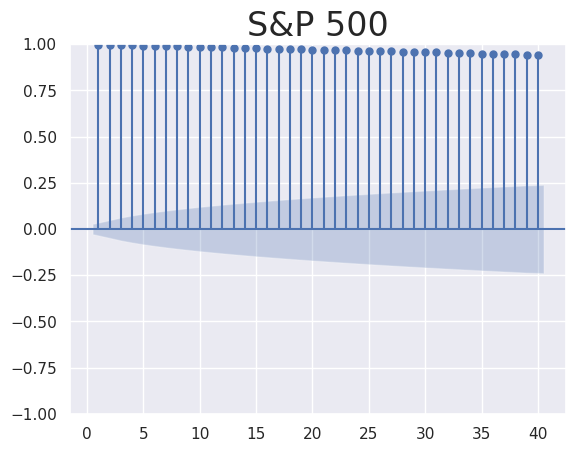

In [36]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("S&P 500", size=24)
plt.show()

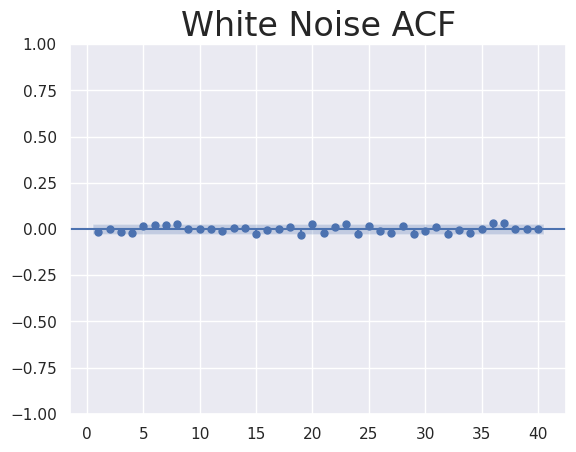

In [37]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("White Noise ACF", size=24)
plt.show()

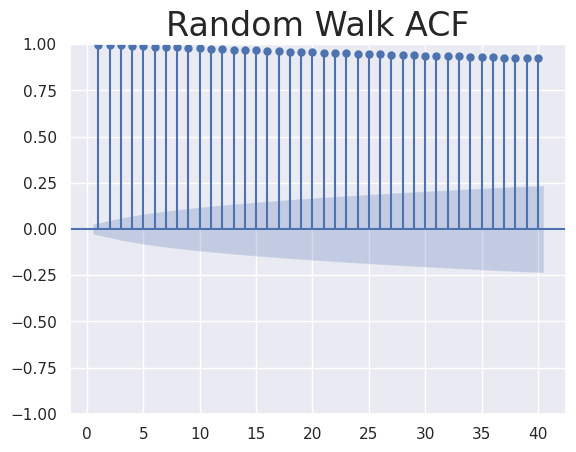

In [38]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title("Random Walk ACF", size=24)
plt.show()

### PACF

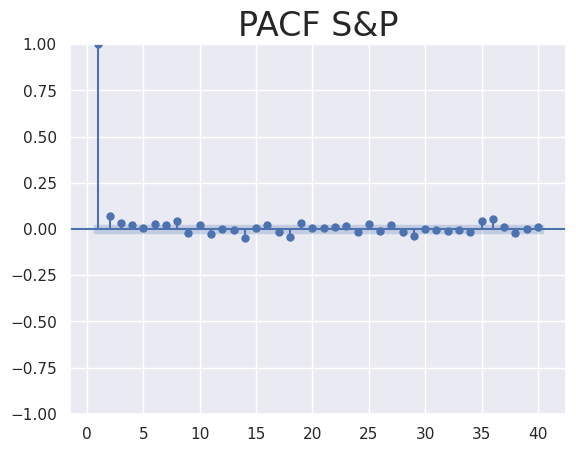

In [40]:
sgt.plot_pacf(df.market_value, lags=40, zero=False , method="ols")
plt.title("PACF S&P", size=24)
plt.show()

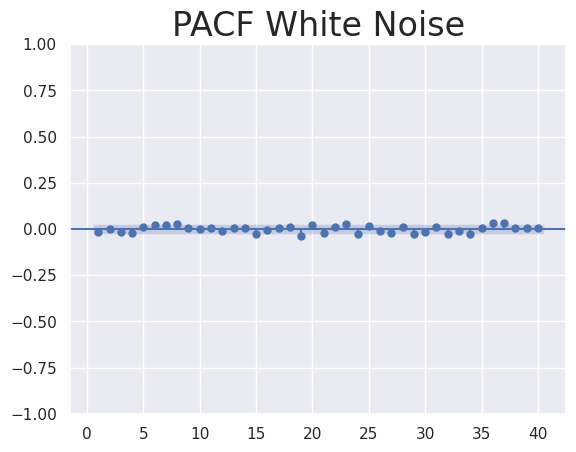

In [41]:
sgt.plot_pacf(df.wn, lags=40, zero=False , method="ols")
plt.title("PACF White Noise", size=24)
plt.show()

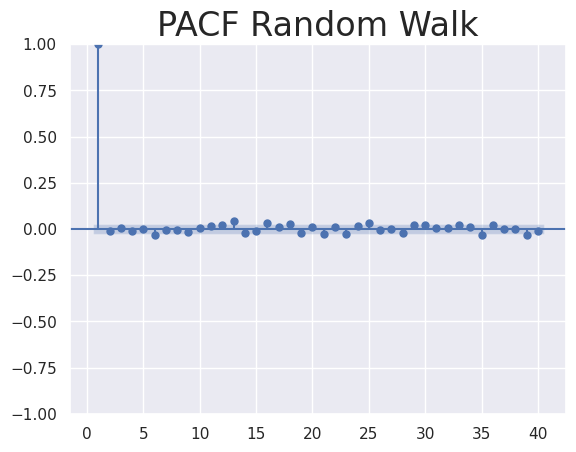

In [42]:
sgt.plot_pacf(df.rw, lags=40, zero=False , method="ols")
plt.title("PACF Random Walk", size=24)
plt.show()